In [137]:
import glob, re
## Pour installer beautifulSoup:
## En ligne de commande : pip install beautifulsoup4
## Au besoin installez pip au préalable : https://docs.python.org/fr/3.5/installing/index.html
from bs4 import BeautifulSoup
## chemin ci-dessous à modifier
path = "Corpus/Annee1999/"

In [138]:
### parcours du fichier xml avec Beautiful soup

path_fichier1 = path + "1999-05-17.xml"

with open(path_fichier1) as f:
  html_doc = f.read()

soup = BeautifulSoup(html_doc, 'html.parser')

for cpt_txt, d in enumerate(soup.find_all("div", type="article")):
    texte = d.text
    mots_tok_simple = texte.split()
    mots_tok_avance = re.findall("[a-zA-ZÀ-ÿ][a-zA-ZÀ-ÿ-]*", texte)
    
    voc_simple = set(mots_tok_simple)
    voc_avance = set(mots_tok_avance)
    
    print("-"*20)
    if voc_simple == voc_avance:
        print("IDEM", voc_simple)
        continue
        
    print("Observons la différence entre les deux tokénisations")
    intersection = voc_simple.intersection(voc_avance)
    print("Nombre de mots en commun: ", len(intersection))
    diff_simple = voc_simple.difference(voc_avance)
    print("  Présents uniquement dans la tokénisation simple (sur %i types):"%len(voc_simple))
    print("  ",diff_simple)
    diff_avance = voc_avance.difference(voc_simple)
    print("  Présents uniquement dans la tokénisation avancée (sur %i types):"%len(voc_avance))
    print("  ",diff_avance)
    if cpt_txt==10:
        break

--------------------
IDEM {'à', 'en', 'Saint-Mihiel', 'blessés', 'Saudrupt', 'En', 'dans', 'près', 'une', 'difficulté', 'Meuse', 'de', 'collision', 'Quatre', 'Planeur'}
--------------------
Observons la différence entre les deux tokénisations
Nombre de mots en commun:  24
  Présents uniquement dans la tokénisation simple (sur 28 types):
   {'Société,', 'Monde,', "l'article", ':'}
  Présents uniquement dans la tokénisation avancée (sur 28 types):
   {'article', 'Société', 'l', 'Monde'}
--------------------
Observons la différence entre les deux tokénisations
Nombre de mots en commun:  44
  Présents uniquement dans la tokénisation simple (sur 56 types):
   {"qu'entre", "c'est", 'légendaire,', "d'abord", 'département.', 'communes,', 'jamais.', 'apprécié,', 'veine.', 'essences,', 'passionnées,', 'appuyé,'}
  Présents uniquement dans la tokénisation avancée (sur 58 types):
   {'essences', 'c', 'entre', 'd', 'jamais', 'département', 'qu', 'appuyé', 'veine', 'abord', 'communes', 'légendaire',

In [139]:
#Créons un vocabulaire tiré de ce fichier  du texte

L = []
for d in soup.find_all("div", type="article"):
    texte = d.text
    mots = re.findall("[a-zA-ZÀ-ÿ][a-zA-ZÀ-ÿ-]*", texte)
    L+=mots
    
print(sorted(set(L), reverse=True)[:150])

['ô', 'îlots', 'îles', 'île', 'êtres', 'être', 'êtes', 'évêque', 'évêché', 'événements', 'événement', 'évènement', 'évoqués', 'évoquée', 'évoqué', 'évoquèrent', 'évoquera', 'évoquer', 'évoquent', 'évoque', 'évoquant', 'évoquaient', 'évoqua', 'évolué', 'évolutions', 'évolution', 'évoluera', 'évoluer', 'évoluent', 'évolue', 'évoluant', 'évoluait', 'évocation', 'évitée', 'éviter', 'évitent', 'évite', 'évitant', 'évitait', 'évidente', 'évident', 'évidence', 'évidemment', 'évertué', 'évertue', 'éventuels', 'éventuelles', 'éventuellement', 'éventuelle', 'éventualité', 'éventail', 'éveillé', 'éveillent', 'éveil', 'évasion', 'évaporés', 'évalués', 'évadait', 'évacuées', 'évacuer', 'évacue', 'évacuation', 'étêtée', 'été', 'étuve', 'étudiées', 'étudié', 'étudier', 'étudie', 'étudiants', 'étudiantes', 'étudiante', 'étudiant', 'étudia', 'études', 'étude', 'étroites', 'étroite', 'étroit', 'étrenné', 'étreint', 'étrangères', 'étrangère', 'étranges', 'étrangers', 'étranger', 'étrangement', 'étouffer'

In [140]:
import matplotlib.pyplot as pyplot
vocabulaire = set()#On stocke le vocabulaire découvert
#对当前字典来说是新词
for cpt, d in enumerate(soup.find_all("div", type="article")):
    texte = d.text
    mots = texte.split()
    set_mots = set(mots)
    dejavu = vocabulaire.intersection(set_mots)
    nouveau = set_mots.difference(vocabulaire)
    for x in set_mots:
        vocabulaire.add(x)
    print(list(nouveau)[:10])#un échantillon
    print("Proportion mots nouveaux : %f"%(1-(len(dejavu)/len(set_mots))))
    print("")
    if cpt==10:
        break

['à', 'en', 'Saint-Mihiel', 'blessés', 'Saudrupt', 'En', 'dans', 'près', 'une', 'difficulté']
Proportion mots nouveaux : 1.000000

['Elections', 'Proust', 'Patrick', 'la', 'Georges', 'Monde,', 'Société,', 'festival', 'reportage', 'particulier']
Proportion mots nouveaux : 0.892857

['Et', 'hommage', 'mains', 'communes,', 'ans', 'centaines', 'surtout', 'veine.', 'essences,', 'et']
Proportion mots nouveaux : 0.910714

['Danielle', '19', 'conseiller', 'volontaire', 'salle', 'Vigneulles', ';', '03.29.89.33.84.', 'Permanences', '30']
Proportion mots nouveaux : 0.914894

['sollicitées', 'stop', 'Rhin.', 'décidé', "l'intersection", 'travaux', 'membres', 'matériel', 'établie', 'sécurité']
Proportion mots nouveaux : 0.903226

['Gaudry', '(55),', 'entre', 'passe', 'terminer', 'Poisson', 'Poissons.', 'Poissons', 'réception,', 'marche,']
Proportion mots nouveaux : 0.698795

['fils', 'fils,', 'parents', 'maire.', 'fois', 'placer', 'marraine', 'mairie,', 'Legile', 'mariages.']
Proportion mots nouveau

In [141]:
## Mettons ça dans des fonctions

def enlever_nombres(texte):
    texte = re.sub("[0-9\.]*", "", texte)
    return texte

def update_vocabulaire(set_mots, vocabulaire):
    dejavu = vocabulaire.intersection(set_mots)
    nouveau = set_mots.difference(vocabulaire)

    return vocabulaire, dejavu, nouveau

vocabulaire = set()#On stocke le vocabulaire découvert
for cpt, d in enumerate(soup.find_all("div", type="article")):
    texte = d.text
    texte = enlever_nombres(texte)
    mots = re.findall("[a-zA-ZÀ-ÿ][a-zA-ZÀ-ÿ-]*", texte)
    set_mots = set(mots)
    vocabulaire, dejavu, nouveau = update_vocabulaire(set_mots, vocabulaire)
    print(list(nouveau)[:10])#un échantillon
    print("Proportion mots nouveaux : %f"%((len(nouveau)/len(set_mots))))
    print("")
    if cpt==10:
        break


['à', 'en', 'Saint-Mihiel', 'blessés', 'Saudrupt', 'En', 'dans', 'près', 'une', 'difficulté']
Proportion mots nouveaux : 1.000000

['en', 'Elections', 'festival', 'Proust', 'reportage', 'Société', 'particulier', 'Patrick', 'abois', 'aux']
Proportion mots nouveaux : 1.000000

['Et', 'c', 'entre', 'hommage', 'une', 'mains', 'ans', 'centaines', 'surtout', 'et']
Proportion mots nouveaux : 1.000000

['à', 'Saint-Rémy', 'Danielle', 'en', 'Heudicourt', 'tél', 'conseiller', 'Woinville', 'volontaire', 'salle']
Proportion mots nouveaux : 1.000000

['sollicitées', 'usagers', 'décidé', 'intersection', 'travaux', 'membres', 'matériel', 'établie', 'sécurité', 'confortation']
Proportion mots nouveaux : 1.000000

['à', 'Gaudry', 'entre', 'terminer', 'Poissons', 'Avril', 'a', 'villes', 'arrivée', 'Chassey-Beaupre']
Proportion mots nouveaux : 1.000000

['à', 'fils', 'salle', 'a', 'parents', 'fois', 'et', 'marraine', 'placer', 'Legile']
Proportion mots nouveaux : 1.000000

['à', 'fax', 'tél', 'conseiller

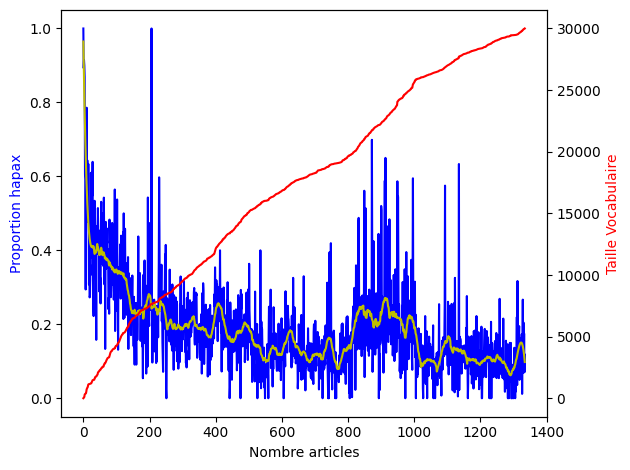

In [142]:
##Visualisons tout cela sur un graphique
import matplotlib.pyplot as pyplot

fig, ax1 = pyplot.subplots()

proportion_hapax = []
taille_voc = []
vocabulaire = set()

for cpt, d in enumerate(soup.find_all("div", type="article")):
    text = d.text
    texte = enlever_nombres(text)
    mots = re.findall("[a-zA-ZÀ-ÿ][a-zA-ZÀ-ÿ-]*", texte)
    set_mots = set(mots)
    vocabulaire, dejavu, nouveau = update_vocabulaire(set_mots, vocabulaire)
    for x in set_mots:
        vocabulaire.add(x)
    
    prop_hapax = len(nouveau)/(len(nouveau)+len(dejavu))
    proportion_hapax.append(prop_hapax)
    taille_voc.append(len(vocabulaire))
    
ax1.set_xlabel("Nombre articles")

ax1.plot(proportion_hapax, 'b-')
ax1.set_ylabel('Proportion hapax', color='b')

ax2 = ax1.twinx()

ax2.plot(taille_voc, 'r')
ax2.set_ylabel('Taille Vocabulaire', color='r')

from scipy.signal import savgol_filter
hapax_curve = savgol_filter(proportion_hapax, 51, 3)

ax1.plot(hapax_curve, 'y-')## On ajoute une courbe avec un lissage ("smoothing") 
## Le lissage qui atténue les différences locales pour avoir une meilleure une vision globale
fig.tight_layout()
pyplot.show()

In [146]:
###préparons notre vocabualire issu du glaff
import re, json
import glob

with open("GLAFF-1.2.2/glaff-1.2.2.txt", encoding="utf-8") as f:
  ligne = f.readline()
  cpt=0
  dic_glaff = {}
  while len(ligne)>0:
    cpt+=1
    elems = re.split("\|", re.sub("\n", "", ligne))#返回含有指定元素的列表
    freq = 0
    forme = elems[0]
    for index in range(6, len(elems)+1, 2):
        freq+=float(elems[index])#ensemble des relative frequency
    dic_glaff[forme] = freq
    ligne = f.readline()

with open("freq_glaff_%i.json"%cpt, "w") as w:
    w.write(json.dumps(dic_glaff, ensure_ascii =False))
set_mots_glaff = set(dic_glaff.keys())
print("Taille Glaff : %i types"%len(set_mots_glaff))

Taille Glaff : 1082688 types


In [147]:
def count_word_lengths(words):
    word_length_count = {}
    for word in words:
        length = len(word)
        if length in word_length_count:
            word_length_count[length] += 1
        else:
            word_length_count[length] = 1
    return word_length_count


def count_word_case(words):
    word_dict = {'lowercase': 0, 'uppercase': 0}
    for word in words:
        if word[0].islower():
            word_dict['lowercase'] += 1
        elif word[0].isupper():
            word_dict['uppercase'] += 1
    return word_dict


Comparaisons d’un jour sur l’autre

In [149]:
## Maintenant on fait la même chose sur tout le corpus de mai 1999
import glob
vocabulaire = set()
#Trier les fichiers par date
file=glob.glob("Corpus/Annee1999/1999-05*")
file.sort()

dicoParJour={}#pour écrire dans un fichier json

for day in file:
    for path_fichier in glob.glob(day):
        print(path_fichier)
        texte=""#trouver tous les mots dans un corpus
        soup = BeautifulSoup(html_doc, 'html.parser')
        with open(path_fichier) as f:
            html_doc = f.read()
        
        for cpt_txt, d in enumerate(soup.find_all("div", type="article")):
            texte += " "+d.text
        enlever_nombres(texte)
        #tokeniser
        #mots = texte.split()
        mots = re.findall("[a-zA-ZÀ-ÿ][a-zA-ZÀ-ÿ-]*", texte)
        set_mots = set(mots)

        #garder trace des nouveaux mots

        vocabulaire, dejavu, nouveau = update_vocabulaire(set_mots, vocabulaire)
        
        for x in set_mots:
            vocabulaire.add(x)
        

        #garder trace du nombre de mots par taille
        dico_len=count_word_lengths(nouveau)

        #garder trace du nombre de mots capitalisés ou non*
        dico_case=count_word_case(nouveau)

        dicoParJour[path_fichier]=[len(nouveau),list(nouveau),(1-(len(dejavu)/len(set_mots))),dico_len,dico_case]
        
        ### Afficher ces statistiques sur la taille et la casse

        print("Nombre de mots nouveaux: ",len(nouveau))
        print(list(nouveau)[:10])#un échantillon
        print("Proportion mots nouveaux : %f"%(1-(len(dejavu)/len(set_mots))))
        print("")
        if cpt==10:
            break
with open("mots_par_jour.json", "w",encoding='utf8') as w:
    w.write(json.dumps(dicoParJour, ensure_ascii =False) )


Corpus/Annee1999/1999-05-17.xml
Nombre de mots nouveaux:  29830
['profanes', 'souffert', 'opposés', 'timbres', 'VSAB', 'Rochefort', 'succédés', 'MONPLAISIR', 'adverse', 'hélium']
Proportion mots nouveaux : 1.000000

Corpus/Annee1999/1999-05-18.xml
Nombre de mots nouveaux:  14371
['huppés', 'riens', 'toits', 'véléités', 'Crivelli', 'Chalèze', 'Rasolo', 'Disons-le', 'Ghedi', 'opulente']
Proportion mots nouveaux : 0.480057

Corpus/Annee1999/1999-05-19.xml
Nombre de mots nouveaux:  9545
['mariera', 'concentrations', 'Noidanais', 'gui', 'Matinée', 'gymnastique-aérobic', 'Malorie', 'lycéenne', 'Thonne-la-Long', 'rassemblent']
Proportion mots nouveaux : 0.351151

Corpus/Annee1999/1999-05-20.xml
Nombre de mots nouveaux:  8961
['adorent', 'chantera', 'rémunérée', 'Démissions', 'HENRION', 'Morain', 'mortuacien', 'désemparée', 'lapsus', 'souillée']
Proportion mots nouveaux : 0.310693

Corpus/Annee1999/1999-05-21.xml
Nombre de mots nouveaux:  6891
['pavoise-t-on', 'Navigation', 'Cengiz', 'conjugal

In [156]:
import matplotlib.pyplot as plt

def plot_word_lengths(word_lengths):
    plt.bar(word_lengths.keys(), word_lengths.values())
    plt.xlabel('Word Length')
    plt.ylabel('Word Count')
    plt.title('Word Length Distribution')
    plt.show()

Comparer avec Giaff jour après jour

Corpus/Annee1999/1999-05-17.xml
Nombre de mots nouveaux:  33257
['(Verdun)', '90%', 'VSAB', 'journalières,', 'dense,', 'Foret', 'coquillages.', 'absolument.', "(40'),", 'Bisard,']
Proportion mots nouveaux : 0.709907
{8: 4209, 3: 1255, 4: 2011, 13: 975, 6: 4023, 5: 3250, 12: 1447, 11: 2075, 7: 4447, 22: 28, 9: 3476, 2: 413, 14: 809, 19: 122, 10: 2729, 17: 200, 16: 380, 15: 933, 1: 48, 24: 24, 29: 7, 21: 61, 18: 135, 23: 38, 20: 85, 26: 15, 33: 10, 25: 13, 27: 10, 30: 6, 28: 6, 32: 7, 31: 5, 37: 1, 36: 1, 35: 2, 34: 1}
Proportion mots nouveaux capitalisés:  0.4727125116516824



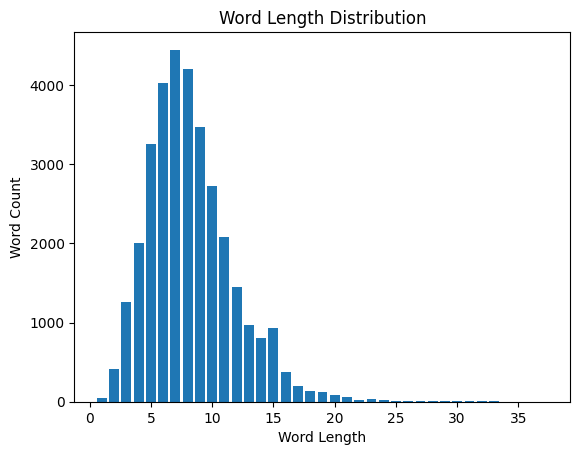

Corpus/Annee1999/1999-05-18.xml
Nombre de mots nouveaux:  21345
['Expositions,', 'Chalèze', "d'Essey-lès-Nancy,", 'bienvenues.', 'Villemin/N.', 'Disons-le', 'Ghedi', 'diminuer.', '4.800', 'Talbot']
Proportion mots nouveaux : 0.452426
{12: 1035, 7: 2665, 18: 106, 11: 1423, 9: 2389, 5: 2006, 6: 2507, 15: 603, 8: 2729, 10: 1912, 4: 1243, 3: 547, 16: 277, 14: 551, 13: 747, 20: 66, 19: 90, 27: 9, 22: 30, 17: 165, 23: 26, 30: 8, 24: 20, 2: 83, 25: 11, 21: 46, 26: 11, 29: 9, 32: 10, 28: 6, 1: 5, 31: 3, 33: 3, 34: 2, 40: 1, 57: 1}
Proportion mots nouveaux capitalisés:  0.4828297025064418



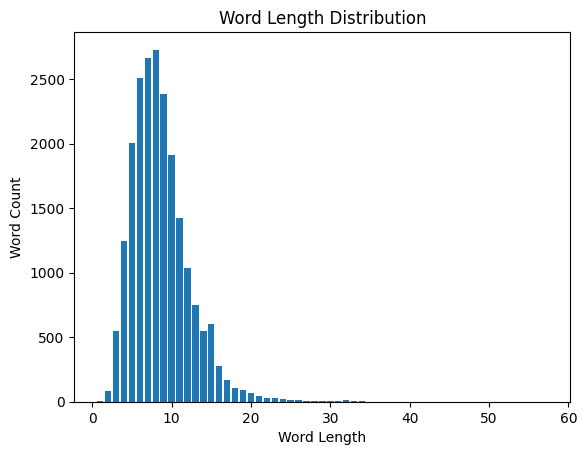

Corpus/Annee1999/1999-05-19.xml
Nombre de mots nouveaux:  14882
['dessous).', 'fleurie).', 'pourront,', 'émotionnel.', '(Magny)', 'mauve,', 'Noidanais', 'Eperon)', "d'organisation,", 'Matinée']
Proportion mots nouveaux : 0.355374
{9: 1722, 11: 1157, 7: 1899, 6: 1571, 15: 434, 19: 57, 5: 1097, 8: 1941, 10: 1415, 12: 806, 13: 602, 4: 768, 16: 187, 14: 452, 20: 42, 3: 368, 25: 14, 17: 121, 18: 70, 2: 45, 22: 21, 21: 40, 23: 16, 1: 5, 24: 16, 29: 3, 28: 3, 31: 1, 26: 3, 43: 1, 27: 3, 40: 1, 54: 1}
Proportion mots nouveaux capitalisés:  0.47372664964386507



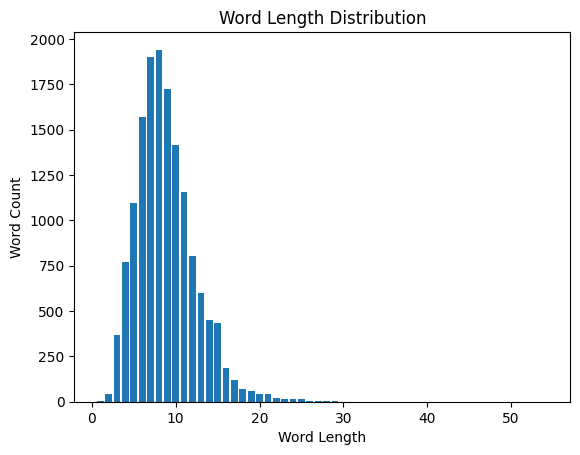

Corpus/Annee1999/1999-05-20.xml
Nombre de mots nouveaux:  14240
['Séraphine,', 'Bregille),', 'Démissions', 'HENRION', 'Morain', 'question)', 'Révillon', 'Toussin', "48''.", 'Pacific']
Proportion mots nouveaux : 0.323357
{10: 1474, 7: 1797, 6: 1492, 9: 1660, 8: 1828, 5: 1095, 4: 642, 17: 131, 11: 1011, 12: 821, 14: 448, 13: 523, 19: 77, 16: 183, 15: 465, 3: 301, 18: 84, 28: 2, 34: 1, 22: 26, 2: 46, 20: 47, 23: 20, 30: 2, 26: 6, 27: 3, 21: 32, 24: 10, 25: 8, 1: 1, 29: 4}
Proportion mots nouveaux capitalisés:  0.5082865168539326



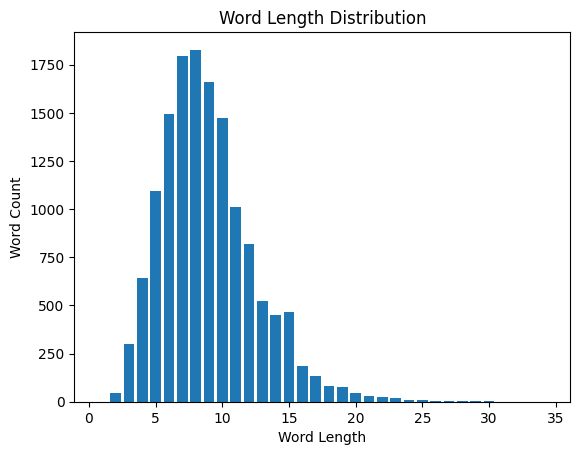

Corpus/Annee1999/1999-05-21.xml
Nombre de mots nouveaux:  11872
['pavoise-t-on', 'Navigation', 'Aqua,', 'Bobenrieth', 'Usep,', "d'aile", "l'animateur.", '1\'11"20', '(environnement,', 'Joux,']
Proportion mots nouveaux : 0.280755
{12: 646, 10: 1214, 5: 878, 6: 1229, 7: 1537, 15: 383, 8: 1463, 11: 917, 16: 139, 9: 1425, 3: 242, 4: 551, 14: 365, 13: 475, 17: 99, 18: 71, 24: 12, 19: 59, 22: 17, 20: 54, 21: 23, 26: 10, 2: 28, 32: 1, 25: 11, 23: 14, 35: 1, 27: 2, 37: 1, 41: 1, 30: 1, 31: 1, 28: 1, 29: 1}
Proportion mots nouveaux capitalisés:  0.4909871967654987



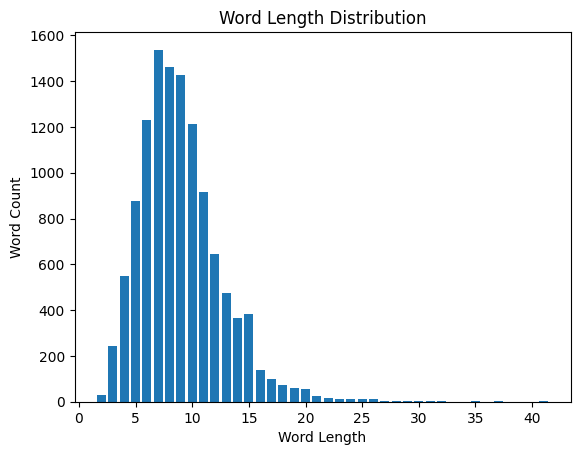

Corpus/Annee1999/1999-05-22.xml
Nombre de mots nouveaux:  11660
["l'éducateur", 'Georges-Franck', 'Pau-Orthez.', 'Bobillier,', 'ENCORE', 'Miroir', 'Dirigeant', 'Imaginaires', 'Courtoy-Gochet', 'tél.03.29.25.62.60.']
Proportion mots nouveaux : 0.268064
{11: 840, 14: 384, 10: 1074, 6: 1198, 9: 1300, 19: 92, 12: 667, 3: 210, 18: 80, 7: 1420, 5: 862, 4: 755, 8: 1465, 17: 115, 15: 356, 13: 458, 20: 50, 22: 23, 16: 175, 23: 19, 21: 38, 25: 6, 27: 3, 1: 3, 2: 35, 26: 5, 24: 8, 57: 1, 28: 6, 32: 1, 31: 4, 30: 1, 29: 3, 60: 1, 34: 1, 42: 1}
Proportion mots nouveaux capitalisés:  0.5097770154373928



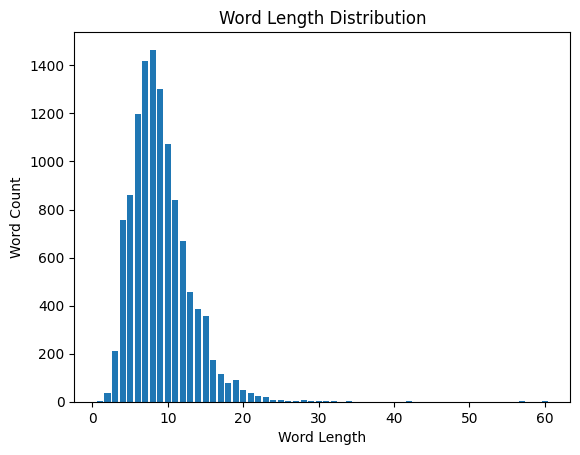

Corpus/Annee1999/1999-05-23.xml
Nombre de mots nouveaux:  12412
['Fourgs', 'Fromeréville,', 'musicassettes', 'tél.03.84.23.64.20', 'Commerce.', 'Tonna,', '58.439.', '(Romy', '(adulte),', 'ESSERT']
Proportion mots nouveaux : 0.269252
{6: 1235, 13: 478, 18: 105, 9: 1348, 7: 1448, 5: 880, 10: 1165, 12: 654, 15: 712, 14: 441, 4: 506, 16: 262, 17: 143, 11: 865, 20: 68, 3: 207, 8: 1590, 19: 125, 25: 16, 29: 1, 21: 38, 26: 14, 24: 14, 22: 29, 2: 31, 35: 4, 23: 13, 34: 1, 27: 8, 31: 1, 42: 1, 28: 5, 30: 1, 36: 1, 1: 1, 33: 1}
Proportion mots nouveaux capitalisés:  0.5206252014179826



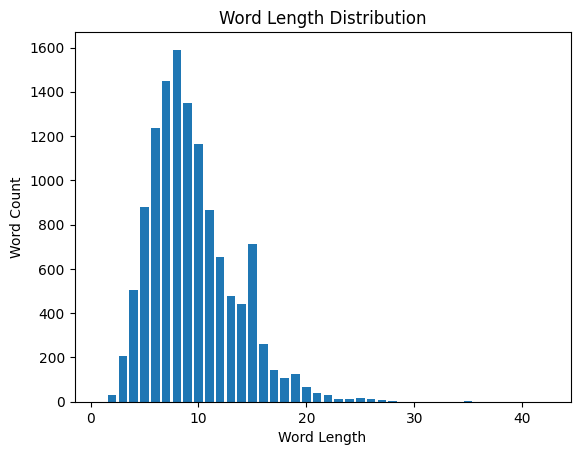

Corpus/Annee1999/1999-05-25.xml
Nombre de mots nouveaux:  9776
['Emereaux,', '(ASSR', "l'ancien.", 'Uslu,', 'Liénard,', 'HT),', 'refleurissent,', "12'54''66.", 'saison),', 'Autos-scooters']
Proportion mots nouveaux : 0.234780
{9: 1154, 5: 891, 8: 1295, 4: 562, 14: 280, 10: 824, 6: 1183, 19: 52, 3: 152, 13: 367, 15: 313, 7: 1188, 16: 123, 11: 653, 12: 443, 18: 75, 2: 42, 17: 83, 26: 4, 20: 26, 27: 4, 21: 21, 22: 14, 25: 4, 31: 1, 23: 8, 52: 1, 28: 3, 24: 6, 1: 3, 30: 1}
Proportion mots nouveaux capitalisés:  0.48956628477905073



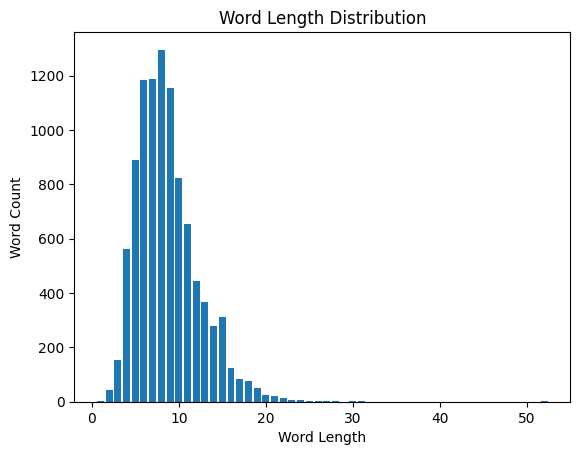

Corpus/Annee1999/1999-05-26.xml
Nombre de mots nouveaux:  11776
['Guiter.', 'Defert,', 'REVIGNY-SUR-', 'Montbéliardp1-6', 'Partagés', 'Bibard', 'desserte,', 'Coroenne,', '(2,06m)', 'Abossoloze']
Proportion mots nouveaux : 0.259973
{7: 1572, 12: 509, 15: 284, 8: 1614, 6: 1656, 9: 1296, 10: 874, 16: 149, 5: 1224, 14: 309, 18: 63, 3: 243, 4: 569, 17: 117, 31: 3, 21: 29, 11: 714, 20: 47, 29: 4, 25: 8, 27: 4, 13: 356, 22: 15, 2: 32, 19: 41, 26: 10, 23: 11, 24: 11, 28: 3, 35: 1, 34: 2, 1: 2, 30: 3, 33: 1}
Proportion mots nouveaux capitalisés:  0.47019361413043476



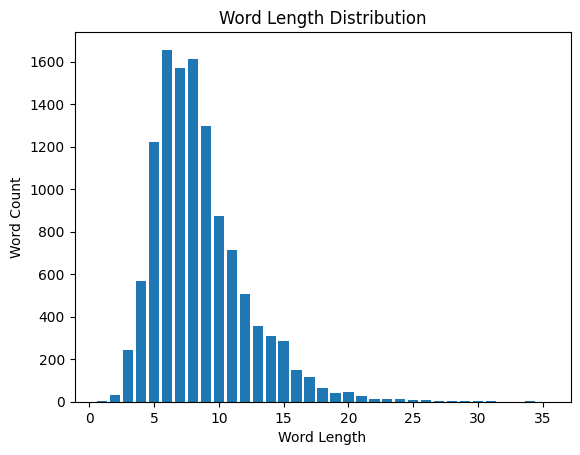

Corpus/Annee1999/1999-05-27.xml
Nombre de mots nouveaux:  8769
['élèvesde', "d'aulnes.", 'Crivelli', 'espoirs),', 'moulée".', "d'ethnologie.", 'Sagenly-Toujani', 'Goumane.', "L'OGC", '3,24']
Proportion mots nouveaux : 0.205478
{8: 1094, 9: 1025, 13: 360, 15: 314, 5: 726, 4: 445, 14: 278, 12: 488, 7: 1056, 3: 141, 27: 5, 6: 944, 16: 148, 10: 801, 22: 19, 11: 638, 17: 81, 20: 37, 24: 7, 21: 22, 19: 33, 18: 59, 25: 5, 29: 3, 28: 4, 2: 23, 23: 5, 26: 4, 33: 1, 30: 1, 1: 1, 32: 1}
Proportion mots nouveaux capitalisés:  0.48728475310753794



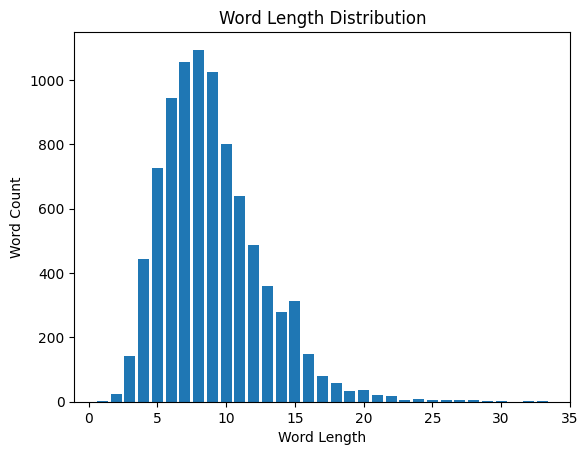

Corpus/Annee1999/1999-05-29.xml
Nombre de mots nouveaux:  8231
['10.OOO', '(Bucey-lès-Gy),', "l'inquiétude.", "d'Uckange", 'Nord-Pas-de-Calais/Picardie,', 'Général-Margueritte', 'MONCLAR', 'consacre,', 'Buste', '16h30),']
Proportion mots nouveaux : 0.196102
{6: 833, 15: 308, 13: 374, 9: 981, 28: 2, 19: 47, 7: 982, 5: 721, 11: 619, 10: 816, 14: 261, 8: 1023, 3: 146, 24: 7, 20: 41, 4: 292, 16: 120, 12: 446, 21: 23, 17: 83, 2: 22, 22: 16, 18: 43, 23: 10, 27: 2, 36: 2, 1: 1, 29: 2, 25: 1, 33: 1, 37: 1, 34: 2, 26: 1, 32: 1, 31: 1}
Proportion mots nouveaux capitalisés:  0.48681812659458146



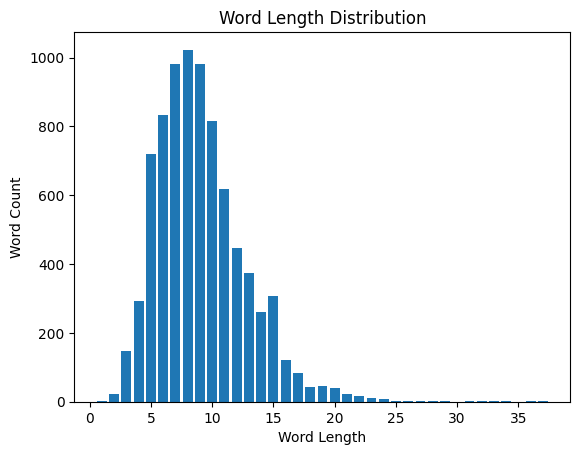

Corpus/Annee1999/1999-05-30.xml
Nombre de mots nouveaux:  8929
['Tamby.', "(1'56''17,", '03.29.90.21.90.', 'Mercy-le-Bas', 'DH),', 'Slot', "l'OSLN", '(réponses', "d'hospitaliers,", 'errain']
Proportion mots nouveaux : 0.195936
{6: 866, 10: 849, 15: 426, 12: 502, 4: 332, 9: 1038, 7: 1084, 5: 624, 13: 388, 8: 1143, 14: 294, 11: 641, 18: 98, 16: 170, 19: 75, 17: 108, 3: 125, 21: 37, 20: 31, 25: 16, 24: 7, 23: 15, 22: 26, 2: 21, 28: 2, 26: 4, 31: 1, 35: 1, 27: 4, 30: 1}
Proportion mots nouveaux capitalisés:  0.5413820136633442



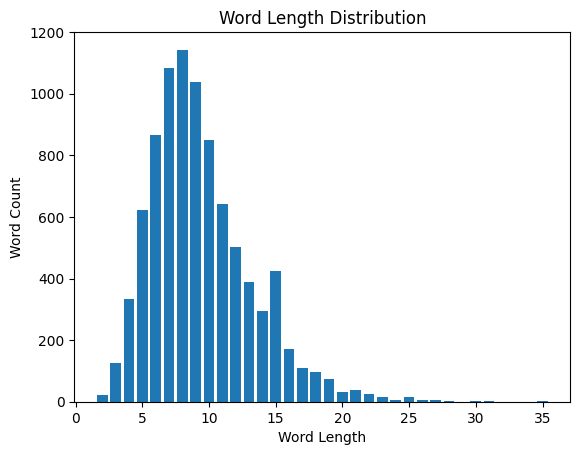

Corpus/Annee1999/1999-05-31.xml
Nombre de mots nouveaux:  8489
['Demouge.', 'Contraddiction', 'infatigable.', 'Etang.', '(38200)', 'Epinal-Saint-Dié', 'Ouabi', 'Magnières-Remenoville,', "d'indifférence", 'Chapelle-Les']
Proportion mots nouveaux : 0.188435
{8: 1195, 14: 293, 12: 426, 6: 1000, 7: 1110, 16: 130, 5: 622, 22: 11, 9: 925, 20: 34, 10: 786, 4: 336, 11: 603, 13: 326, 15: 265, 17: 94, 18: 56, 23: 7, 3: 156, 21: 30, 19: 42, 25: 6, 26: 4, 24: 10, 27: 2, 35: 1, 2: 14, 29: 2, 28: 1, 31: 1, 37: 1}
Proportion mots nouveaux capitalisés:  0.4966427141006008



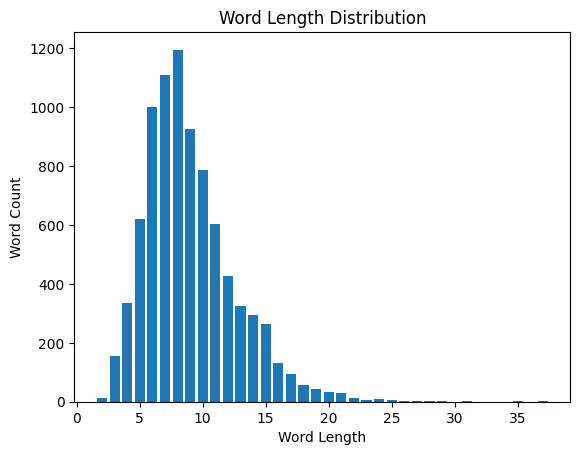

In [158]:
MotDifferent={}
vocabulaire=set(dic_glaff.keys())
LongeurDesMot=[]
Majuscule=[]
Taille_mots=[]
Pro_newwords=[]
date=[]
MotLenNombre=[]
TotalWords=set()
for day in file:
    for path_fichier in glob.glob(day):
        print(path_fichier)
        date.append(path_fichier[17:-4])
        texte=""#trouver tous les mots dans un corpus
        soup = BeautifulSoup(html_doc, 'html.parser')
        with open(path_fichier) as f:
            html_doc = f.read()
        
        #Obtenez de nouveaux mots qui apparaissent chaque jour par rapport aux jours précédents

        for cpt_txt, d in enumerate(soup.find_all("div", type="article")):
            texte += " "+d.text

        enlever_nombres(texte)
        #tokeniser
        #mots = texte.split()
        mots = re.findall("[a-zA-ZÀ-ÿ][a-zA-ZÀ-ÿ-]*", texte)
        set_mots = set(mots)

        #garder trace des nouveaux mots

        vocabulaire, dejavu, nouveau = update_vocabulaire(set_mots, vocabulaire)
        
        for x in set_mots:
            vocabulaire.add(x)
        #garder trace du nombre de mots par taille
        dico_len=count_word_lengths(nouveau)

        #garder trace du nombre de mots capitalisés ou non*
        dico_case=count_word_case(nouveau)

        MotDifferent[path_fichier]=[len(nouveau),list(nouveau),(1-(len(dejavu)/len(set_mots))),dico_len,dico_case]
        ### Afficher ces statistiques sur la taille et la casse
        Majuscule.append(dico_case['uppercase']/len(nouveau))
        Taille_mots.append(len(vocabulaire))
        Pro_newwords.append((1-(len(dejavu)/len(set_mots))))
        TotalWords.update(nouveau)
        #LongeurDesMot.append(list(dico_len.keys()))
       # MotLenNombre.append(list(dico_len.values()))
        print("Nombre de mots nouveaux: ",len(nouveau))
        print(list(nouveau)[:10])#un échantillon
        print("Proportion mots nouveaux : %f"%(1-(len(dejavu)/len(set_mots))))
        print(dico_len)
        print("Proportion mots nouveaux capitalisés: ",dico_case['uppercase']/len(nouveau))
        print("")
        plot_word_lengths(dico_len)


#with open("MotDifferentWithGlaff.json", "w",encoding='utf8') as w:
   # w.write(json.dumps(dicoParJour, ensure_ascii =False) )
 

###Bonus: en faire un graphique


Un graph représente les proportion de mots nouveaux et la proportion de mots capitaliisés jour après jours

/var/folders/lc/3v9v24f114jg6_3p200fnnnw0000gn/T/ipykernel_10056/580608497.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(date)


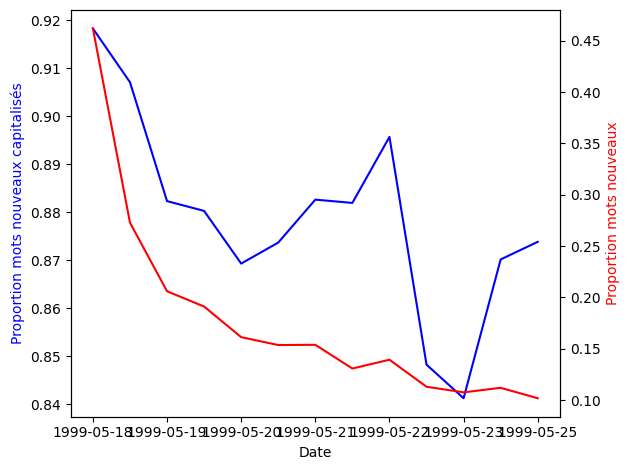

In [103]:
import matplotlib.pyplot as pyplot

fig, ax1 = pyplot.subplots()
ax1.set_xlabel("Date")
ax1.set_xticklabels(date)
ax1.plot(Majuscule, 'b-')
ax1.set_ylabel('Proportion mots nouveaux capitalisés', color='b')

ax2 = ax1.twinx()

ax2.plot(Pro_newwords, 'r')
ax2.set_ylabel('Proportion mots nouveaux', color='r')

from scipy.signal import savgol_filter

fig.tight_layout()
pyplot.show()

Un graph représenté les longueur et les nombre des mots totals

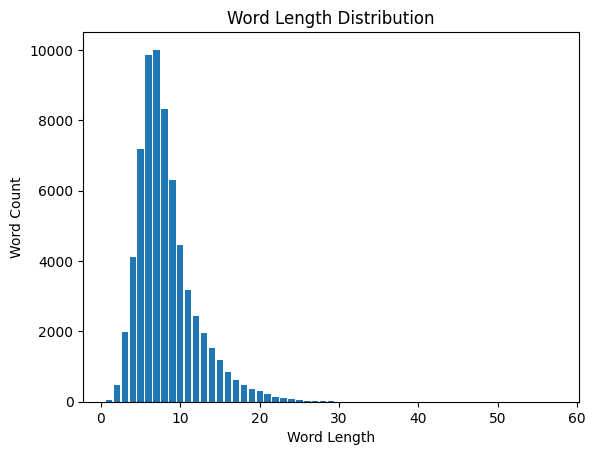

In [155]:
plot_word_lengths(count_word_lengths(TotalWords))

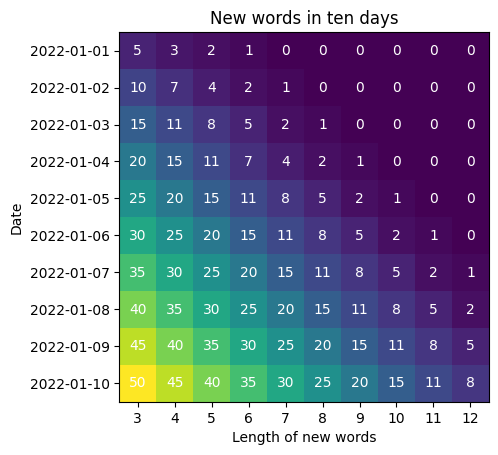

In [115]:
import matplotlib.pyplot as plt
import numpy as np

# 假设数据已经准备好了，分别存储在三个list中：dates、lengths和word_counts
dates = ['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08', '2022-01-09', '2022-01-10']
lengths = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
word_counts = [[5, 3, 2, 1, 0, 0, 0, 0, 0, 0], [10, 7, 4, 2, 1, 0, 0, 0, 0, 0], [15, 11, 8, 5, 2, 1, 0, 0, 0, 0], [20, 15, 11, 7, 4, 2, 1, 0, 0, 0], [25, 20, 15, 11, 8, 5, 2, 1, 0, 0], [30, 25, 20, 15, 11, 8, 5, 2, 1, 0], [35, 30, 25, 20, 15, 11, 8, 5, 2, 1], [40, 35, 30, 25, 20, 15, 11, 8, 5, 2], [45, 40, 35, 30, 25, 20, 15, 11, 8, 5], [50, 45, 40, 35, 30, 25, 20, 15, 11, 8]]

# 将数据转换为二维数组
word_counts = np.array(word_counts)

# 绘制热力图
fig, ax = plt.subplots()
im = ax.imshow(word_counts)

# 添加标题和轴标签
ax.set_xticks(np.arange(len(lengths)))
ax.set_yticks(np.arange(len(dates)))
ax.set_xticklabels(lengths)
ax.set_yticklabels(dates)
ax.set_xlabel('Length of new words')
ax.set_ylabel('Date')
ax.set_title('New words in ten days')

# 添加文字标注
for i in range(len(dates)):
    for j in range(len(lengths)):
        text = ax.text(j, i, word_counts[i, j], ha='center', va='center', color='w')

# 显示图形
plt.show()
